<a href="https://colab.research.google.com/github/richards-okiemute/Cyclistic-Bike-Share-Python-Data-Analytics-Project/blob/main/Cyclistic_Bike_Share_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Data Analytics Case Study - Cyclistic Bike Share.**
---
by **Richards Okiemute**

*richards.okiemute@gmail.com*


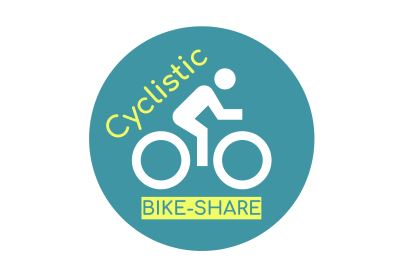

### **About Cyclistic**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: **single-ride passes, full-day passes, and annual memberships.** Customers who purchase single-ride or full-day passes are referred to as **casual riders**. Customers who
purchase annual memberships are Cyclistic **members**.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be
key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very
good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

**Objectives**

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do
that, however, the marketing analyst team needs to better understand how annual members and casual riders dier, why casual
riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in
analyzing the Cyclistic historical bike trip data to identify trends.

**Ask**

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes dierently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Manager's Task**

Moreno has assigned the first question to me to provide answer: How do annual members and casual riders use Cyclistic bikes dierently?



# PREPARE DATA

I will use Cyclistic’s historical trip data to analyze and identify trends. The previous 12 months of Cyclistic trip data
[here](https://divvy-tripdata.s3.amazonaws.com/index.html) for download (**Note:** The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the
datasets are appropriate and will enable me to answer the business questions. The data has been made available by Motivate
International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).)

In [ ]:
#importing important libraries 
import numpy as np #for numerical computation

import pandas as pd  #for data manipulation (cleaning, filtering, dataframe and series creation, data type conversion)

import matplotlib.pyplot as plt #for data visualization

%matplotlib inline

import seaborn as sns  # for data visualization

from datetime import datetime as dt         #for working with datetime

from pandas.api.types import CategoricalDtype  #for categorical value mapping/ordering

sns.set_style('whitegrid')            #layout style

import warnings

warnings.filterwarnings("ignore") #suppressing any warnings


Mounting my google drive

In [ ]:
#mounting google drive on jupyter notebook (google colaborratory)

from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
#importing datasets from my google drive datasets folder
#importing Divvy's recent 12 months datasets

june_2020   = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202006-divvy-tripdata.csv'
july_2020   = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202007-divvy-tripdata.csv'
august_2020 = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202008-divvy-tripdata.csv'
sept_2020   = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202009-divvy-tripdata.csv'
oct_2020    = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202010-divvy-tripdata.csv'
nov_2020    = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202011-divvy-tripdata.csv'
dec_2020    = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202012-divvy-tripdata.csv'
jan_2021    = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202101-divvy-tripdata.csv'
feb_2021    = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202102-divvy-tripdata.csv'
march_2021  = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202103-divvy-tripdata.csv'
april_2021  = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202104-divvy-tripdata.csv'
may_2021    = '/content/drive/MyDrive/My Datasets/Divvy_12months_Data/202105-divvy-tripdata.csv'

#storing files into variables
file1 = pd.read_csv(june_2020)
file2 = pd.read_csv(july_2020)
file3 = pd.read_csv(august_2020)
file4 = pd.read_csv(sept_2020)
file5 = pd.read_csv(oct_2020)
file6 = pd.read_csv(nov_2020)
file7 = pd.read_csv(dec_2020)
file8 = pd.read_csv(jan_2021)
file9 = pd.read_csv(feb_2021)
file10 = pd.read_csv(march_2021)
file11 = pd.read_csv(april_2021)
file12 = pd.read_csv(may_2021)

In [ ]:
#creating a list of the 12 different files
files = [file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12]

#checking the shape of each file

print('The shape of the files are given below:\n')
for file in files:
  print(file.shape)

The shape of the files are given below:

(343005, 13)
(551480, 13)
(622361, 13)
(532958, 13)
(388653, 13)
(259716, 13)
(131573, 13)
(96834, 13)
(49622, 13)
(228496, 13)
(337230, 13)
(531633, 13)


The files all have equal column names.
I will check if the column names are consistent through out the files

In [ ]:
for column in files:       #looping through the datasets to print the column names
    print(column.columns)
    print('\n')

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='obj

The column names looks consistent but I will carry out a boolean check across each file's column to ascertain if they are truly consistent.


In [ ]:
#Boolean test for column names


def consistent_or_not(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12): #a function to check that column names are consistent or not
    if f1.columns.all() == f2.columns.all() == f3.columns.all() == f4.columns.all()\
       == f5.columns.all() == f6.columns.all()== f7.columns.all()== f8.columns.all()\
       == f9.columns.all() == f10.columns.all() == f11.columns.all() == f12.columns.all():
        return 'All 12 files column names are consistent'
    else:
        return 'Inconsistent columns exists'

In [ ]:
consistent_or_not(file1, file2, file3, file4, file5, file6, file7, file8, file9, file10, file11, file12)

'All 12 files column names are consistent'

Now, I am 100% certain that the column names are consistent

Since all 12 files columns are consistent, I will join these files together to form a full table on which I can explore and carry out useful analysis

In [ ]:
#merging files together

full_table = pd.concat(files, axis = 0)

Now I have a very huge table called `full_table`. I will explore this table to understand the types of data it contains.

In [ ]:
#checking the dimension of the table.

print('The full_table has', full_table.shape[0], 'columns and', full_table.shape[1], 'rows')

The full_table has 4073561 columns and 13 rows


Now, let's check the general information about the table.

In [ ]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4073561 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 435.1+ MB


As shown above, the `full_table` contains 9 objects and 4 floats data types.

I will investigate if these objects are unique.

In [ ]:
#checking the number of unique values in the dataset
full_table.select_dtypes(exclude = 'float64').nunique()

ride_id               4073352
rideable_type               3
started_at            3523583
ended_at              3511499
start_station_name        715
start_station_id         1356
end_station_name          716
end_station_id           1356
member_casual               2
dtype: int64

There are exactly **4073352** unique bike riders.

The `rideable_type` contains 3 different rideable type and the `member_casual` contains 2 different membership options.

I will find these categories out by using the unique method

In [ ]:
full_table['rideable_type'].unique()

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

In [ ]:
full_table['member_casual'].unique()

array(['casual', 'member'], dtype=object)

The `rideable_type` contains three different bikes namely:
* **Docked Bike**
* **Electric Bike**
* **Clasic Bike**

While the `member_casual` is made up of:
* **Casual**, and
* **Member**

Now, let us take a sample view of the `full_table` dataset.

In [ ]:
#viewing the first five (5) rows of the dataset

full_table.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.940180,-87.653040,41.931931,-87.677856,casual
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.872077,-87.629543,41.884241,-87.629634,member
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.884241,-87.629634,41.874053,-87.627716,member
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.945529,-87.646439,41.978353,-87.659753,casual
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.921540,-87.653818,41.940180,-87.653040,casual


Interestingly, the `started_at` and `ended_at` is a datetime but appeared as an object. I will convert them to datetime in order to extract other datetime features (time-stamps, day, month, and year) from it.

Also, the `start_station_id` and `end_station_id` doesn't carry any useful information that will help in our analysis. The `start_station_name` and `end_station_name` contain the same information. Therefore, I will drop the  `start_station_id` and `end_station_id` column in order to maximize memory.

# PROCESS DATA


##### CLEAN UP AND PROCESS DATA FOR ANALYSIS
* Drop unnecessary columns
* Manipulate datetime and derive time values from the datetime
* Compute meaningful measures or derived columns (where necessary)
* Check the dimension of the full_table
* Check the full_table data information
* Compute statistical summary for numeric column
* Filter out negative values
* Remove outliers (if present)
* Check for missing values
* Check for duplicated values

In [ ]:
#dropping the  'start_station_id' and 'end_station_id' from the full_table

full_table.drop(['start_station_id', 'end_station_id'], axis =1, inplace = True)

In [ ]:
#converting 'started_at' and 'ended_at' from object to datetime.
#Changing Dtype to datetime
full_table['started_at'] = pd.to_datetime(full_table["started_at"], format="%Y-%m-%d %H:%M:%S")
full_table['ended_at'] = pd.to_datetime(full_table["ended_at"], format="%Y-%m-%d %H:%M:%S")

#extracting datetime features from these columns and mapping the month and days respectively.
day_of_week_arranged= {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
month_order= {1: 'Jan',  2: 'Feb', 3: 'Mar', 4: 'Apr',5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',  9: 'Sep', 10: 'Oct',11: 'Nov', 12: 'Dec'}

full_table['day'] = full_table['started_at'].dt.day       #extracting days
full_table['month'] = full_table['started_at'].dt.month.map(month_order)  #extracting months and reordering the months
full_table['year'] = full_table['started_at'].dt.year   #extracting years
full_table['day_of_week'] = full_table['started_at'].dt.dayofweek.map(day_of_week_arranged)    #extracting day of the week and reordering the day of the week
full_table['starting_time'] = full_table['started_at'].dt.strftime('%H:%M')                     #stripping off hour and minutes out

In [ ]:
#viewing the table to inspect the new columns created
full_table.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,day,month,year,day_of_week,starting_time
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,Damen Ave & Clybourn Ave,41.940180,-87.653040,41.931931,-87.677856,casual,13,Jun,2020,Saturday,23:24
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,Daley Center Plaza,41.872077,-87.629543,41.884241,-87.629634,member,26,Jun,2020,Friday,07:26
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,State St & Harrison St,41.884241,-87.629634,41.874053,-87.627716,member,23,Jun,2020,Tuesday,17:12
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,Broadway & Berwyn Ave,41.945529,-87.646439,41.978353,-87.659753,casual,20,Jun,2020,Saturday,01:09
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,Wilton Ave & Belmont Ave,41.921540,-87.653818,41.940180,-87.653040,casual,25,Jun,2020,Thursday,16:59


The table looks good. Now, I need to create a column that calculate the rider's journey time from `start_at` to `end_at`. We will call this column `ride_length`


In [ ]:
full_table['ride_length'] = (full_table['ended_at'] - full_table['started_at'])                #calculating the difference in time between riders start time and end time
full_table['ride_length (min)'] = round((full_table['ride_length'].dt.total_seconds()/60),2)   #converting extracted seconds to minutes

full_table.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,day,month,year,day_of_week,starting_time,ride_length,ride_length (min)
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,Damen Ave & Clybourn Ave,41.940180,-87.653040,41.931931,-87.677856,casual,13,Jun,2020,Saturday,23:24,0 days 00:12:07,12.12
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,Daley Center Plaza,41.872077,-87.629543,41.884241,-87.629634,member,26,Jun,2020,Friday,07:26,0 days 00:05:48,5.80
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,State St & Harrison St,41.884241,-87.629634,41.874053,-87.627716,member,23,Jun,2020,Tuesday,17:12,0 days 00:08:33,8.55
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,Broadway & Berwyn Ave,41.945529,-87.646439,41.978353,-87.659753,casual,20,Jun,2020,Saturday,01:09,0 days 00:18:49,18.82
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,Wilton Ave & Belmont Ave,41.921540,-87.653818,41.940180,-87.653040,casual,25,Jun,2020,Thursday,16:59,0 days 00:09:23,9.38


In [ ]:
#checking the information of the full_table

full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4073561 entries, 0 to 531632
Data columns (total 18 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   end_station_name    object         
 6   start_lat           float64        
 7   start_lng           float64        
 8   end_lat             float64        
 9   end_lng             float64        
 10  member_casual       object         
 11  day                 int64          
 12  month               object         
 13  year                int64          
 14  day_of_week         object         
 15  starting_time       object         
 16  ride_length         timedelta64[ns]
 17  ride_length (min)   float64        
dtypes: datetime64[ns](2), float64(5), int64(2), object(8), timedelt

The memory used has increased from 435+ MB to 590+ MB

The `ride_length(min)` is a float64.


In [ ]:
print('The columns has also increased to ' +str(len(full_table.columns)) +' columns (from ' +str(len(file1.columns))+ ' columns)')

The columns has also increased to 18 columns (from 13 columns)


In [ ]:
#checking the dimenstion of the table.

print('The full_table has', full_table.shape[0], 'columns and', full_table.shape[1], 'rows')

The full_table has 4073561 columns and 18 rows


In [ ]:
#Compute statistical summary for numeric column

full_table.select_dtypes(exclude ='object').describe()

,start_lat,start_lng,end_lat,end_lng,day,year,ride_length,ride_length (min)
count,4.073561e+06,4.073561e+06,4.068524e+06,4.068524e+06,4.073561e+06,4.073561e+06,4073561,4.073561e+06
mean,4.190331e+01,-8.764451e+01,4.190360e+01,-8.764479e+01,1.589837e+01,2.020305e+03,0 days 00:24:13.581111219,2.422635e+01
std,4.404066e-02,2.598052e-02,4.412742e-02,2.611267e-02,8.784882e+00,4.605507e-01,0 days 06:03:17.748528998,3.632958e+02
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01,1.000000e+00,2.020000e+03,-21 days +19:50:02,-2.904997e+04
25%,4.188213e+01,-8.765875e+01,4.188224e+01,-8.765887e+01,8.000000e+00,2.020000e+03,0 days 00:07:40,7.670000e+00
50%,4.189964e+01,-8.764107e+01,4.190000e+01,-8.764129e+01,1.600000e+01,2.020000e+03,0 days 00:14:01,1.402000e+01
75%,4.192955e+01,-8.762759e+01,4.192958e+01,-8.762769e+01,2.300000e+01,2.021000e+03,0 days 00:25:51,2.585000e+01
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,3.100000e+01,2.021000e+03,37 days 16:43:21,5.428335e+04


The minimum ride length seem to be erroneous since a travel time cannot be negative.

The maximum time looks more like an outlier. I will use a boxplot to confirm these and filter out these values.

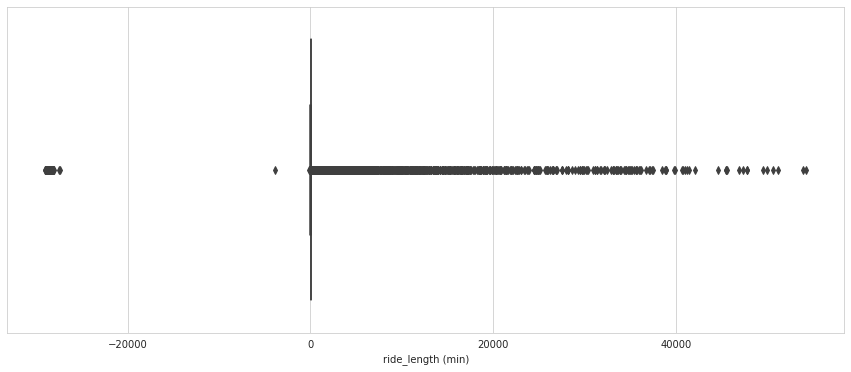

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(full_table['ride_length (min)'])

Indeed there are a lot of outliers in the `ride_length`. The huge standard deviation indicates the effects of extreme values.

The `ride_length` will be capped to a maximum of 24hours (1440mins) ride.

Negative values and values about the `ride_length` cap will be filtered out.

Also, There are some bikes that were returned to Divvy's HeadQuater (HQ QR) for quality control. These bikes have ride length equal to zero. These values will be filtered out too.

I will carry out these task after ensuring there are no missing values and duplicate data in the dataset

In [ ]:
#checking for missing values

full_table.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    201975
end_station_name      229190
start_lat                  0
start_lng                  0
end_lat                 5037
end_lng                 5037
member_casual              0
day                        0
month                      0
year                       0
day_of_week                0
starting_time              0
ride_length                0
ride_length (min)          0
dtype: int64

There are a lot of missing values in the dataset. I will check if they are greater than 20% of the dataset. I will drop the values if the missing percentage is less than 20%.

Besides, these values are geographical based values. I cannot infer from the dataset or use missing values imputation.

In [ ]:
#computing the percentage of missing values in the dataset
def missing_percent(dataframe):
        missing_entries = dataframe.isnull().sum().sum()
        total_entries = np.product(dataframe.shape)
        percent_missing = round((missing_entries / total_entries)*100,2)
        percent_missing
        print('{}% of the dataset is missing'.format(percent_missing))

missing_percent(full_table)

0.6% of the dataset is missing


I will have to drop the missing values since the percentage is very small

In [ ]:
#dropping missing values
full_table.dropna(axis =0, inplace = True)

In [ ]:
#checking for missing values again to ascertain the missing values were successfully dropped

full_table.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
day                   0
month                 0
year                  0
day_of_week           0
starting_time         0
ride_length           0
ride_length (min)     0
dtype: int64

Yes! All missing values have been handled successfully.

Now, I will move on to checking for duplicated values (if any).

I will create a function to check for duplicated values. 

In [ ]:
#checking for duplicates rows

def duplicates(dataframe):    #a function to check for duplicate rows in the dataset
  if dataframe[dataframe.duplicated()].shape[0] == 0:
    print('No duplicate exists in the dataset')
  else:
    print(dataframe[dataframe.duplicated()].shape[0], 'duplicates exist in the dataset')

duplicates(full_table)

No duplicate exists in the dataset


Since no duplicate exists in the dataset, I will go ahead and filter out negative values, aboved `ride_length` capped values, and bikes at 'HQ QR'

In [ ]:
#filtering out negative values and values above the 24hours daily ride cap
filtered_table = full_table[full_table['ride_length (min)']>0]
filtered_table = filtered_table[filtered_table['ride_length (min)']<1440]

#filtering out bikes returned to the HQ QR
filtered_table = filtered_table[filtered_table['start_station_name'] != 'HQ QR'] 

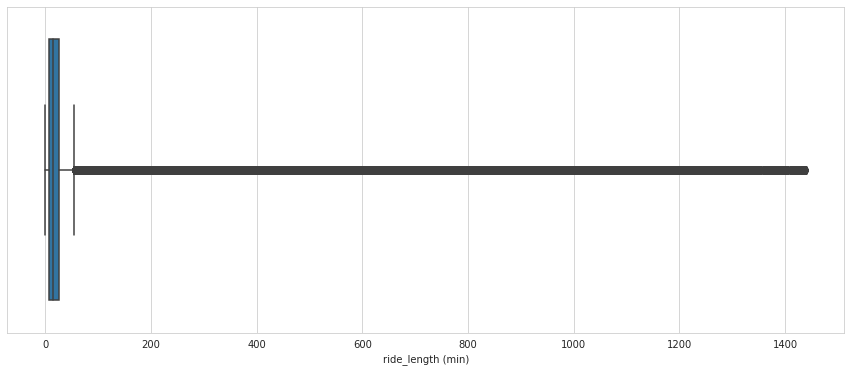

In [ ]:
#checking for outliers again
plt.figure(figsize=(15,6))
sns.boxplot(filtered_table['ride_length (min)'])

Comparing this visualization with the previous visualization, you will see that the dataset is now cleaned. All outliers have been filtered out.

Let's check the dataset information once more to see the value of the standard deviation of the `ride length`. By now, we should have a reduced standard deviation.

In [ ]:
filtered_table['ride_length (min)'].describe()

count    3.747371e+06
mean     2.366035e+01
std      4.363133e+01
min      2.000000e-02
25%      7.870000e+00
50%      1.427000e+01
75%      2.617000e+01
max      1.439900e+03
Name: ride_length (min), dtype: float64

As expected, the standard deviation is now about 44mins, minimum ride length is now less than a minute while the average ride length is about 24mins and the maximum ride_length is about a day.

After cleaning this huge dataset, I will love to view the head (first five rows from the top) and the tail (last five rows at the bottom) of the dataset just to see if they are exactly the same.

# ANALYZE

The main objective of this project was to answer the question: **"How do Members and Casual Riders use Cyclistic Bike differently?"**

To answer these questions, I will make a list of some sub-questions to ask. The answers from these questions will provide a considerable insights into how Members and Casual Riders differ from each other in their Cyclistic bike use.

* What is the average ride length or ride time between Members and Casual Riders?
* Average ride length or ride time by days for Members and Casual Riders?
* Between Members and Casual Riders, who rides most during weekdays and weekends?
* What type of bikes do Members and Casual Riders prefer?
* The difference in ridership trend between Members and Casual Riders

### **Analyzing for Insights**

In [ ]:
round(filtered_table.groupby('member_casual')['ride_length (min)'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,1573282.0,35.60,61.25,0.02,11.40,20.77,39.35,1439.90
member,2174089.0,15.02,19.72,0.02,6.43,11.18,19.38,1439.72


**Insights:**
* The average ride time for Casual riders : **35.60 min**
* The average ride time for Members riders : **15.02 min**
* The average ride time of the casual riders is more than twice that of the members.
* But, there are more member riders than there are casual riders

In [ ]:
pd.DataFrame(filtered_table.groupby('member_casual')['year'].value_counts()).rename(columns = {'year': 'Count of Riders'})


Count of Riders
member_casual year                 
casual        2020          1137546
              2021           435736
member        2020          1528916
              2021           645173

**Insights:**
* On a yearly basis:
    * There are more Members and Casual riders for 2020 than there are for 2021.
    * This can be inferred from the data collection as they are more data for 2020 (June - December) than they are for 2021 (January - May)
    * Overall, there are more Members riders in both years than Casual riders 

In [ ]:
pd.DataFrame(filtered_table.groupby('member_casual')['rideable_type'].value_counts()).rename(columns = {'rideable_type': 'Bike Counts'})


Bike Counts
member_casual rideable_type             
casual        docked_bike        1067100
              classic_bike        264386
              electric_bike       241796
member        docked_bike        1258074
              classic_bike        576642
              electric_bike       339373

**Insights:**
* Analyzing by available Bike types:
    * **Docked Bikes** is the most preferred bike for both Member riders and Casual riders.
    * **Classic Bikes** is the second most preferred and,
    * **Electric Bike** is the least preferred amongst both categories of riders.

In [ ]:
filtered_table.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'day', 'month', 'year',
       'day_of_week', 'starting_time', 'ride_length', 'ride_length (min)'],
      dtype='object')

In [ ]:
pd.DataFrame(filtered_table.groupby('member_casual')['day_of_week'].value_counts()).rename(columns = {'day_of_week': 'Bike Counts'})

Bike Counts
member_casual day_of_week             
casual        Saturday          368267
              Sunday            306728
              Friday            225761
              Thursday          175183
              Monday            171687
              Wednesday         166472
              Tuesday           159184
member        Saturday          331993
              Friday            323226
              Wednesday         321974
              Thursday          316635
              Tuesday           305018
              Monday            291033
              Sunday            284210

**Insights:**
* There are more Casual riders during weekends (Saturday and Sundays) than week days.
* The Member rides more across Saturday to Tuesday. Mondays and Sundays are days with members riding less.

In [ ]:
pd.DataFrame(filtered_table.groupby(['member_casual', 'year'])['month'].value_counts()).rename(columns = {'month': 'Bike Counts'})

Bike Counts
member_casual year month             
casual        2020 Aug         281684
                   Jul         267529
                   Sep         214630
                   Jun         154026
                   Oct         122359
                   Nov          72848
                   Dec          24470
              2021 May         216608
                   Apr         120310
                   Mar          75551
                   Jan          14675
                   Feb           8592
member        2020 Aug         323766
                   Sep         283659
                   Jul         280483
                   Oct         215133
                   Jun         187698
                   Nov         149131
                   Dec          89046
              2021 May         234152
                   Apr         177779
                   Mar         130045
                   Jan          68818
                   Feb          34379

* Analyzing Membership type (Casual and Member) based on Yearly and Month ridership count
    * In 2020:
        * August witnessed the highest ridership for both Casual and Member Riders.
        * December was the month with least ridership for both membership types.

    * In 2021:
        * May witnessed the highest ridership for both Casual and Member Riders.

        * February was the month with least ridership for both membership types.

* **Observation:**
    * The riders prefer to ride more during the warmer months of August, July, September and June.
    * Colder months like December, January, and February experiences less riders.

In [ ]:
pd.DataFrame(filtered_table.groupby(['year','member_casual', 'rideable_type'])['month'].value_counts()).rename(columns = {'month': 'Bike Counts'})

Bike Counts
year member_casual rideable_type month             
2020 casual        classic_bike  Dec          11260
                   docked_bike   Jul         266852
                                 Aug         259264
                                 Sep         170625
                                 Jun         154026
                                 Oct          79089
                                 Nov          45670
                                 Dec           4913
                   electric_bike Sep          44005
                                 Oct          43270
                                 Nov          27178
                                 Aug          22420
                                 Dec           8297
                                 Jul            677
     member        classic_bike  Dec          59143
                   docked_bike   Aug         292771
                                 Jul         279512
                                 Sep         230807
                                 Jun         187698
                                 Oct         154834
                                 Nov         104680
                                 Dec           7771
                   electric_bike Oct          60299
                                 Sep          52852
                                 Nov          44451
                                 Aug          30995
                                 Dec          22132
                                 Jul            971
2021 casual        classic_bike  May         123459
                                 Apr          70499
                                 Mar          45354
                                 Jan           8219
                                 Feb           5595
                   docked_bike   May          43142
                                 Apr          24608
                                 Mar          15569
                                 Jan           2092
                                 Feb           1250
                   electric_bike May          50007
                                 Apr          25203
                                 Mar          14628
                                 Jan           4364
                                 Feb           1747
     member        classic_bike  May         184850
                                 Apr         143619
                                 Mar         106803
                                 Jan          53192
                                 Feb          29035
                   docked_bike   Jan              1
                   electric_bike May          49302
                                 Apr          34160
                                 Mar          23242
                                 Jan          15625
                                 Feb           5344

* Analyzing Membership type (Casual and Member) based on bike types, year, month, and ridership count
    * **Casual:**
      * In 2020:
        * Used more Docked bikes in the warmer months (August, July, September, and June).
        * Only employed the usage of Classic Bikes in December.
        * More Electric bikes were used in September while in June, the least Electric bikes were used.

    * In 2021:
        * More Classic Bikes were used and in the month of May, the maximum amount of Classic Bikes were used.
        * January and Febraury were months with the least Classic Bike riders.
        * Docked Bikes and Electric Bikes have the same trend.
            * May was the month with the most riders for both bikes.
            * February was the month with the least riders for both bikes.
    
    * **Members:**
      * In 2020:
        * Classic bikes were used only in December.
        * The maximum Docked Bikes were used in the August while in December, the minimum number of Docked Bikes were used.
        *Electric Bikes were used mostly in October and least in July.
     
      * In 2021:
        * Classic Bikes were utilized more in December and least in February
        * Strikingly, Docked Bikes were used just once in January.
        * Elastic Bikes were used more in May and least in Febraury.


# VISUALIZATION

Let's also carry out some python inline visualization

---



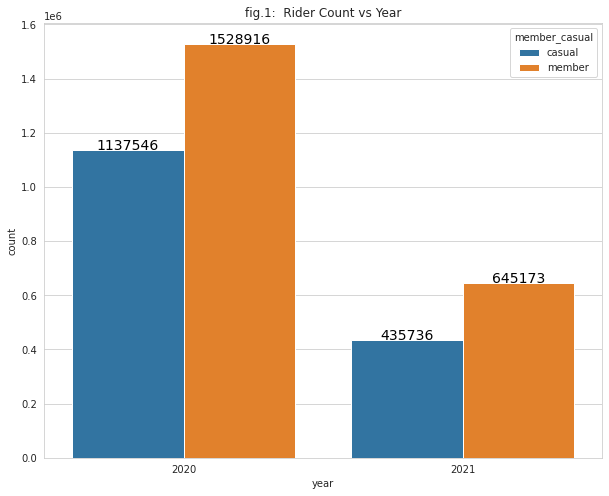

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data = filtered_table, x= 'year', hue = 'member_casual')
plt.title('fig.1:  Rider Count vs Year')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='baseline', color='black', size=14)
plt.show()

Fig. 1 above indicates that there are more Member riders than Casual riders for both 2020 and 2021.

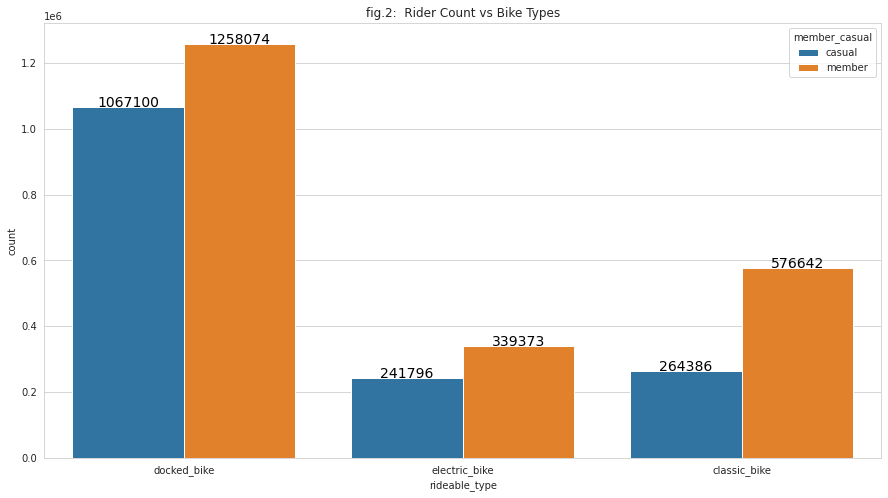

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = filtered_table, x= 'rideable_type', hue = 'member_casual')
plt.title('fig.2:  Rider Count vs Bike Types')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='baseline', color='black', size=14)
plt.show()

Fig. 2 above shows that Docked Type bikes were more preferred among the riders while Classic bikes comes next with Electric bikes being the least.

In [ ]:
filtered_table.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'day', 'month', 'year',
       'day_of_week', 'starting_time', 'ride_length', 'ride_length (min)'],
      dtype='object')

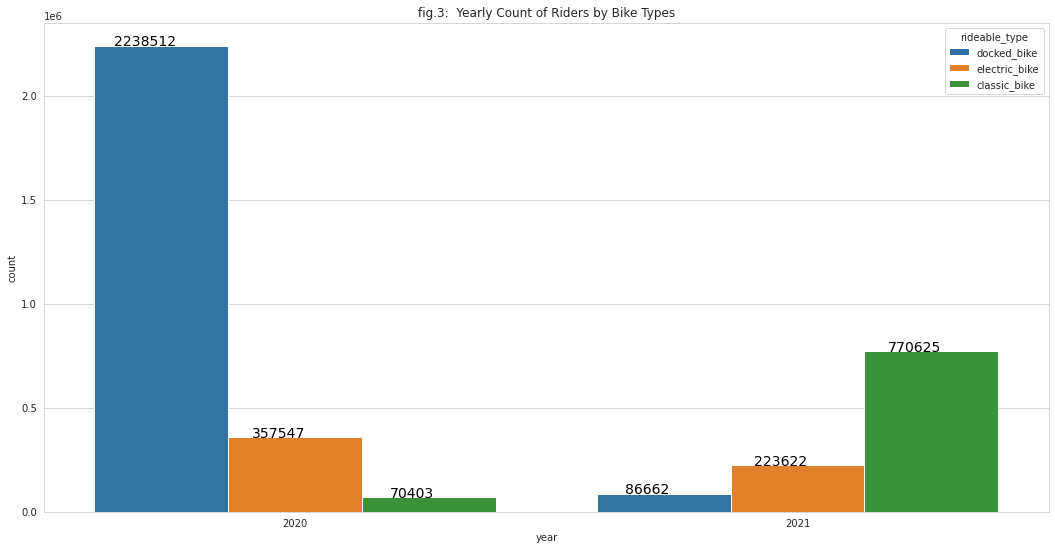

In [ ]:
plt.figure(figsize=(18,9))
ax = sns.countplot(data = filtered_table, x= 'year', hue = 'rideable_type')
plt.title('fig.3:  Yearly Count of Riders by Bike Types')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+0.2), ha='center', va='baseline', color='black', size=14)
plt.show()

A yearly view of the riders shows that in 2020, there were more Docked bike riders, follwed by electric bikes while Classic bike riders were the least preferred bikes.

The exact opposite was the case for 2021 as Classic bikes were more, followed by Electric bikes as Docked bikes became the least used bikes.

In [ ]:
arranged_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
arranged_month_axis = filtered_table['month']
arranged_xaxis = filtered_table.set_index(arranged_month_axis).loc[arranged_months]

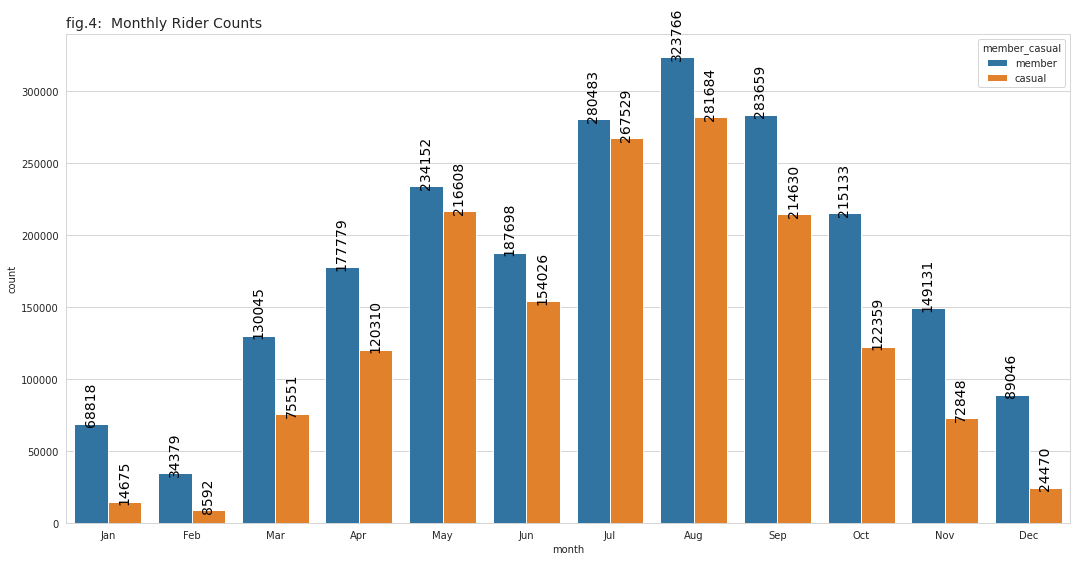

In [ ]:
plt.figure(figsize=(18,9))
ax = sns.countplot(data = arranged_xaxis, x = 'month', hue = 'member_casual')
plt.title('fig.4:  Monthly Rider Counts', loc = 'left', size = 14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+0.2), ha='center', va='baseline', color='black', size=14, rotation=90)
plt.show()

Fig. 4 shows that August was the month with most bike riders for both membership categories. 

The busiest months were  July, August, and September.

The months with the least riders are December, January, and February.

In [ ]:
arranged_days = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
arranged_axis = filtered_table['day_of_week']
arranged_day_axis = filtered_table.set_index(arranged_axis).loc[arranged_days]

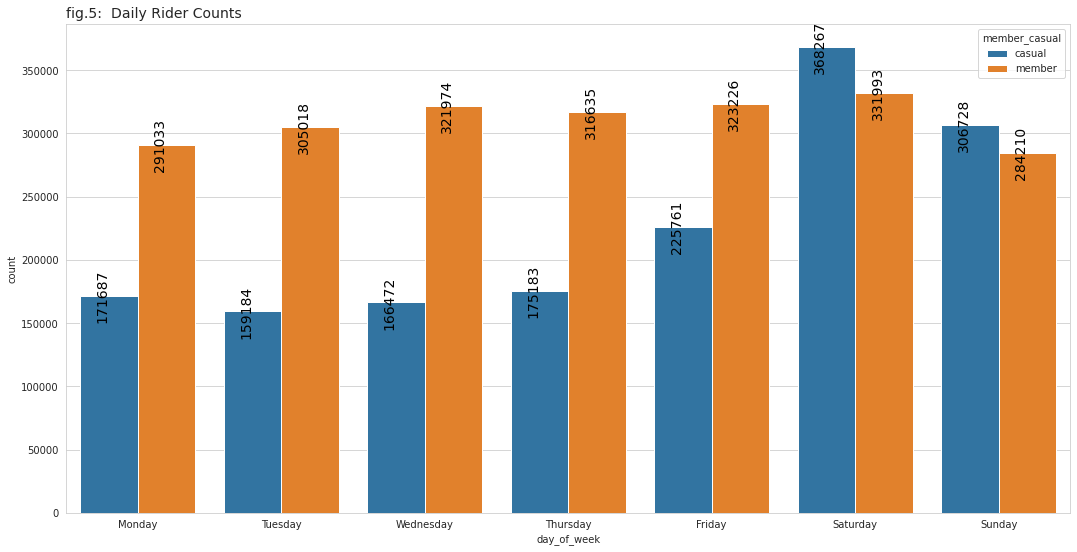

In [ ]:
plt.figure(figsize=(18,9))
ax = sns.countplot(data = arranged_day_axis, x = 'day_of_week', hue = 'member_casual')
plt.title('fig.5:  Daily Rider Counts', loc = 'left', size = 14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+0.2), ha='center', va='center', color='black', size=14, rotation=90)
plt.show()

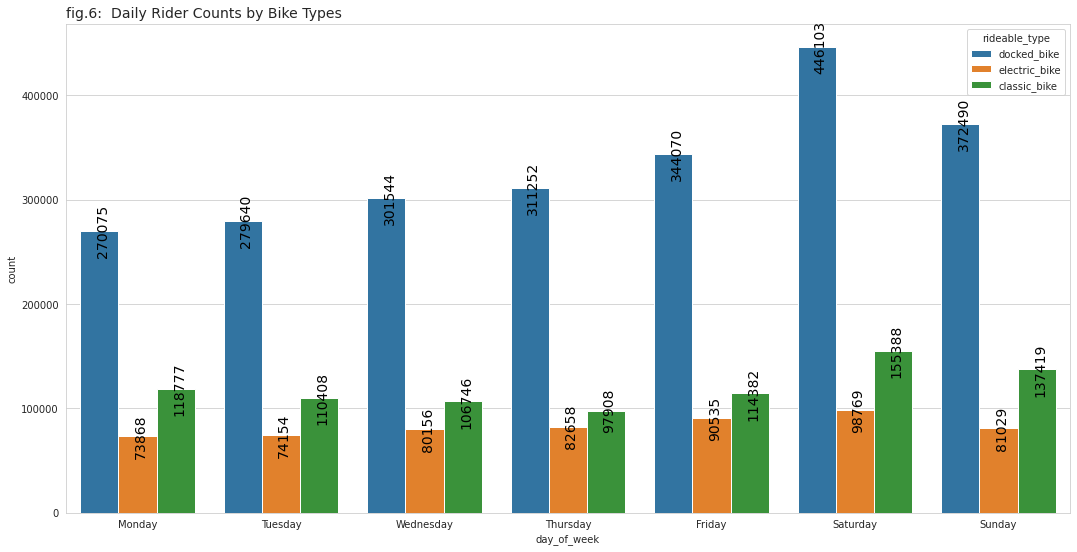

In [ ]:
plt.figure(figsize=(18,9))
ax = sns.countplot(data = arranged_day_axis, x = 'day_of_week', hue = 'rideable_type')
plt.title('fig.6:  Daily Rider Counts by Bike Types', loc = 'left', size = 14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()+0.2), ha='center', va='center', color='black', size=14, rotation=90)
plt.show()

Fig. 6 shows that the most Docked bikes were preferred from Monday to Sunday

In [ ]:
filtered_table.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'day', 'month', 'year',
       'day_of_week', 'starting_time', 'ride_length', 'ride_length (min)'],
      dtype='object')

Text(0.5, 1.0, 'Travel trend of Members')

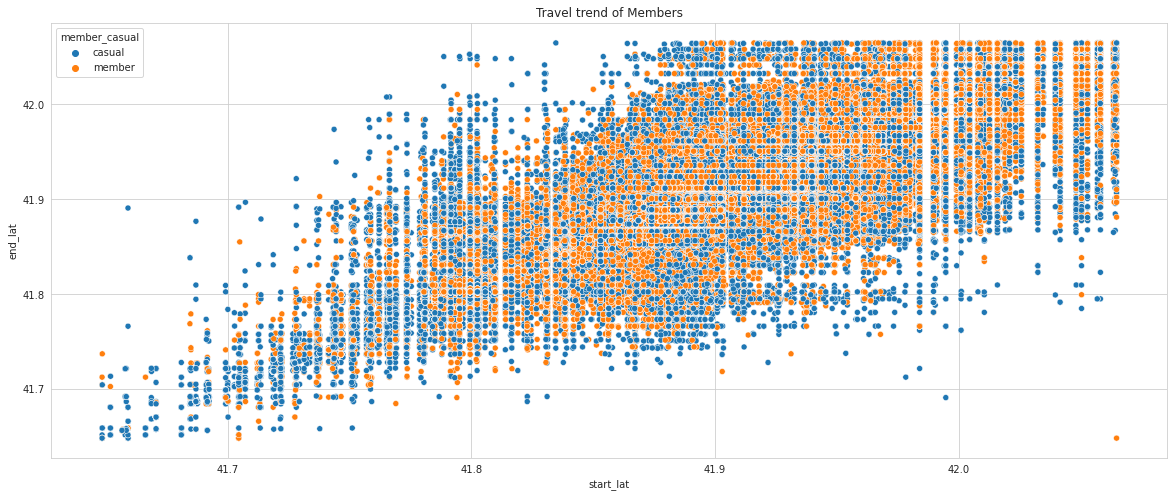

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(data = filtered_table, x = 'start_lat', y = 'end_lat', hue = 'member_casual')
plt.title ('Travel trend of Members')

There isn't any clear difference between the travel paths of both casual and member riders.

We can infer that both the casual and member riders follow similar routes

### **ACT**

* Conclusions
* Recommendations


* Conclusions

**How do annual members and casual riders use Cyclistic bikes differently?**

After carrying out analysis on the cyclistic 12 months (June, 2020 - May, 2021) datasets, the following conclusions were established:

* **Averager time spent riding cyclistic Bike:**
   *  Casual riders spend an average of 35.60 mins using cyclistics bikes daily while use an average of 15 mins riding cyclistics bikes.
   * On daily basis, Casual riders would spend more about twice the time members used in riding their cyclistic bikes.

* **Monthly behaviour of Cyclistic Bike riders:**

   * August and May are months with highest numbers of riders for both casual and Member riders

   * December, January, and Febraury are months with least riders for both Casual and Members 
   * On monthly level, they are not disitnct/clear differences between the casual and members riders.

* **On a Daily Basis:**

   * Saturdays and Sundays are highly preferrable days for casual riders; they prefer to ride more on weekends.
   * Member riders ride consistenly across all days.

* **By Bike types:**
The conclusion on this category was done using only 2020 observations as the dataset doesn't hold much observations for 2021 compared to 2020.
   *  Casual used more Docked bikes in the warmer months (August, July, September, and June).
   *  Only employed the usage of Classic Bikes in December.
   *  More Electric bikes were used in September while in June, the least Electric bikes were used.
* While:

   *  Members used Classic bikes only in December.
   *  The maximum Docked Bikes were used by members in the August while in December, the minimum number of Docked Bikes were used.
   *  Electric Bikes were used mostly by members in October and least in July.

### **Recommendation**

* **Why would casual riders buy Cyclistic annual memberships?**

   * The analysis shows that casual riders spend double the average time riding their bikes than member riders therefore **PRICE** of bike renders can be a factor that can influence a casual riders decision to signing up for membership.


   * Since Casual riders ride more during the weekend, increasing the price for weekend bike rentals might cause them to consider going to membership.

   * Also, limit access of Docked bikes to casual riders during weekends and granting all exclusive access to all bike types to members both on weekends and weekdays might also encourage casual riders to go for membership.

   * Giving member riders special incentives on peak months such as August and May persuade Casual riders to consider signing up for membership.

     * Implementing gift strategies like; if a member rides greater than 50km, he saves a percentage of his next month subscription and gets gifts

 * Reducing membership registration fee for peak casual rider month and increasing rental fee for Casual riders in these months might encourage them to join the membership
 
 
**How can Cyclistic use digital media to influence casual riders to become members?**

* **Digital Market Campaign:**
  
  * The digital media depatment at Cyclistic should set up adverts on the benefits of becoming a member rider at Cyclistic bikes.
  * These adverts should be targetted to only the Casual members.
  * Send customized discounted membership price adverts to Casual members via social media and e-mail.

